In [2]:
# !pip install numpy mtplotlib seabron pandas openpyxl

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
customer = pd.read_excel(r"C:\Users\Croma Campus\Downloads\Ecomm.xlsx", sheet_name="CustomerDetail")

In [33]:
customer.head(2)

,CustomerID,CustomerID.1,Order Date,Month,MonthName,DateInText,Customer Name,State or Province,City,Gender,Gender.1,Gender.2
0,CUS7253,7253,2015-01-07,1,Jan,01/07/2015,Bonnie Potter,Washington,Anacortes,M,1,MALE
1,CUS4875,4875,2015-06-13,6,Jun,06/13/2015,Ronnie Proctor,California,San Gabriel,F,0,FEMALE


In [34]:
orders = pd.read_excel(r"C:\Users\Croma Campus\Downloads\Ecomm.xlsx", sheet_name="Jan")

In [35]:
orders.head(2)

,Order ID,CustomerID,Amount,Profit,Quantity ordered new,Product Category,Product Sub-Category,Payment Mode
0,88522,4666,11.36,4.5600,4,Office Supplies,Pens & Art Supplies,Credit Card
1,90193,4663,6011.76,4390.3665,12,Furniture,Chairs & Chairmats,Credit Card


In [36]:
customer.columns

Index(['CustomerID', 'CustomerID.1', 'Order Date', 'Month', 'MonthName',
       'DateInText', 'Customer Name', 'State or Province', 'City', 'Gender',
       'Gender.1', 'Gender.2'],
      dtype='object')

In [37]:
customer = customer.drop(columns=['CustomerID','Month','DateInText','Gender','Gender.1'])

In [38]:
customer.head(2)

,CustomerID.1,Order Date,MonthName,Customer Name,State or Province,City,Gender.2
0,7253,2015-01-07,Jan,Bonnie Potter,Washington,Anacortes,MALE
1,4875,2015-06-13,Jun,Ronnie Proctor,California,San Gabriel,FEMALE


In [41]:
customer.rename(columns={'CustomerID.1':'CustomerID','Gender.2':'Gender'}, inplace=True)

In [42]:
customer.head(2)

,CustomerID,Order Date,MonthName,Customer Name,State or Province,City,Gender
0,7253,2015-01-07,Jan,Bonnie Potter,Washington,Anacortes,MALE
1,4875,2015-06-13,Jun,Ronnie Proctor,California,San Gabriel,FEMALE


In [45]:
# Checking null/blank values
customer.isnull().sum()

CustomerID           0
Order Date           0
MonthName            0
Customer Name        0
State or Province    0
City                 0
Gender               0
dtype: int64

In [43]:
orders.head(2)

,Order ID,CustomerID,Amount,Profit,Quantity ordered new,Product Category,Product Sub-Category,Payment Mode
0,88522,4666,11.36,4.5600,4,Office Supplies,Pens & Art Supplies,Credit Card
1,90193,4663,6011.76,4390.3665,12,Furniture,Chairs & Chairmats,Credit Card


In [46]:
orders.isnull().sum()

Order ID                0
CustomerID              0
Amount                  0
Profit                  0
Quantity ordered new    0
Product Category        0
Product Sub-Category    0
Payment Mode            0
dtype: int64

In [52]:
customer['CustomerID'].duplicated().sum()

np.int64(0)

In [55]:
df = pd.merge( orders , customer , on='CustomerID' , how='left' )

In [56]:
df.shape

(1952, 14)

In [57]:
df.isnull().sum()

Order ID                0
CustomerID              0
Amount                  0
Profit                  0
Quantity ordered new    0
Product Category        0
Product Sub-Category    0
Payment Mode            0
Order Date              0
MonthName               0
Customer Name           0
State or Province       0
City                    0
Gender                  0
dtype: int64

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order ID              1952 non-null   int64         
 1   CustomerID            1952 non-null   int64         
 2   Amount                1952 non-null   float64       
 3   Profit                1952 non-null   float64       
 4   Quantity ordered new  1952 non-null   int64         
 5   Product Category      1952 non-null   object        
 6   Product Sub-Category  1952 non-null   object        
 7   Payment Mode          1952 non-null   object        
 8   Order Date            1952 non-null   datetime64[ns]
 9   MonthName             1952 non-null   object        
 10  Customer Name         1952 non-null   object        
 11  State or Province     1952 non-null   object        
 12  City                  1952 non-null   object        
 13  Gender            

In [59]:
df.describe()

,Order ID,CustomerID,Amount,Profit,Quantity ordered new,Order Date
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952
mean,82365.924180,5335.484119,1016.631368,114.812829,12.944672,2015-04-08 19:16:43.278688512
min,359.000000,1573.000000,1.680000,-16476.838000,1.000000,2015-01-20 00:00:00
25%,86767.750000,3445.000000,58.265000,-84.485400,5.000000,2015-02-12 00:00:00
50%,88376.000000,5243.000000,203.340000,1.476450,10.000000,2015-05-12 00:00:00
75%,89957.000000,7876.000000,842.937500,116.201575,16.000000,2015-05-21 00:00:00
max,91586.000000,8845.000000,50912.000000,9228.225600,167.000000,2015-06-15 00:00:00
std,19042.295798,2241.346363,2641.056401,1141.110170,13.871565,NaN


In [64]:
col = df.select_dtypes(include=np.number).columns
col

Index(['Order ID', 'CustomerID', 'Amount', 'Profit', 'Quantity ordered new'], dtype='object')

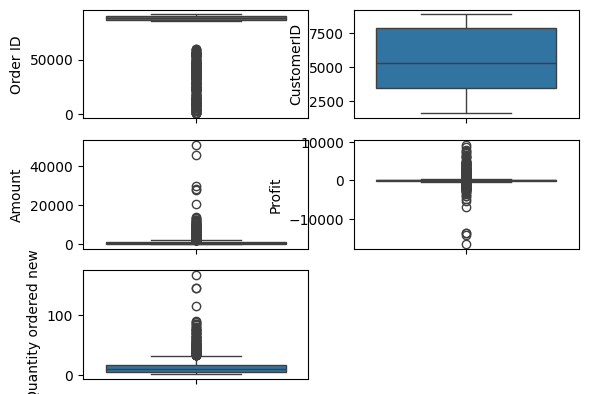

In [65]:
for i in range(len(col)):
    plt.subplot(3,2,i+1)
    sns.boxplot(df[col[i]])
plt.show()

In [66]:
df['z_score'] = (df['Amount']-df['Amount'].mean())/df['Amount'].std()

In [67]:
df.head(3)

,Order ID,CustomerID,Amount,Profit,Quantity ordered new,Product Category,Product Sub-Category,Payment Mode,Order Date,MonthName,Customer Name,State or Province,City,Gender,z_score
0,88522,4666,11.36,4.5600,4,Office Supplies,Pens & Art Supplies,Credit Card,2015-05-12,May,Gwendolyn F Tyson,Minnesota,Prior Lake,MALE,-0.380632
1,90193,4663,6011.76,4390.3665,12,Furniture,Chairs & Chairmats,Credit Card,2015-05-12,May,Gwendolyn F Tyson,Minnesota,Prior Lake,FEMALE,1.891337
2,90192,2583,208.56,-53.8096,22,Furniture,Office Furnishings,Credit Card,2015-05-12,May,Gwendolyn F Tyson,Minnesota,Prior Lake,MALE,-0.305965


In [69]:
df.shape

(1952, 15)

In [73]:
df = df[df['z_score']>-3]

In [74]:
df = df[df['z_score']<3]

In [75]:
df.shape

(1923, 15)

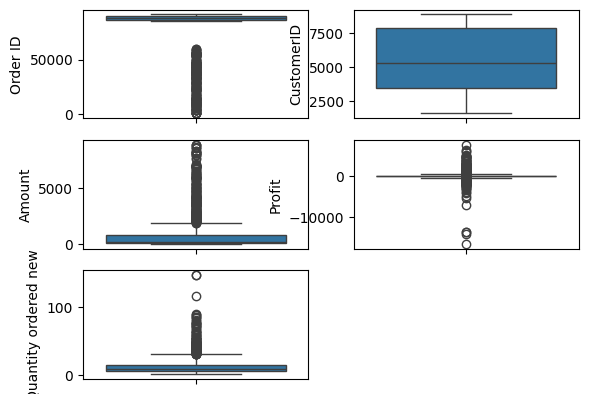

In [76]:
for i in range(len(col)):
    plt.subplot(3,2,i+1)
    sns.boxplot(df[col[i]])
plt.show()

In [77]:
df = df.drop(columns=['z_score'])

In [78]:
df.shape

(1923, 14)

In [79]:
df.head(2)

,Order ID,CustomerID,Amount,Profit,Quantity ordered new,Product Category,Product Sub-Category,Payment Mode,Order Date,MonthName,Customer Name,State or Province,City,Gender
0,88522,4666,11.36,4.5600,4,Office Supplies,Pens & Art Supplies,Credit Card,2015-05-12,May,Gwendolyn F Tyson,Minnesota,Prior Lake,MALE
1,90193,4663,6011.76,4390.3665,12,Furniture,Chairs & Chairmats,Credit Card,2015-05-12,May,Gwendolyn F Tyson,Minnesota,Prior Lake,FEMALE


In [95]:
obg = df.groupby('Gender').agg({'Quantity ordered new':'sum'}).reset_index()

In [96]:
obg

,Gender,Quantity ordered new
0,FEMALE,7203
1,MALE,17008


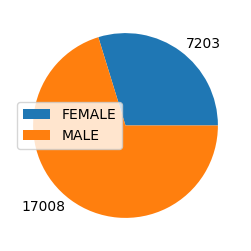

In [99]:
plt.figure(figsize=(6,3))
plt.pie(obg['Quantity ordered new'] , labels=obg['Quantity ordered new'])
plt.legend(['FEMALE','MALE'])
plt.show()

In [104]:
obg = df.groupby('Gender').agg({'Quantity ordered new':'count','Amount':'sum'}).reset_index()

In [105]:
obg

,Gender,Quantity ordered new,Amount
0,FEMALE,538,455147.11
1,MALE,1385,1077715.39


In [107]:
df.head(2)

,Order ID,CustomerID,Amount,Profit,Quantity ordered new,Product Category,Product Sub-Category,Payment Mode,Order Date,MonthName,Customer Name,State or Province,City,Gender
0,88522,4666,11.36,4.5600,4,Office Supplies,Pens & Art Supplies,Credit Card,2015-05-12,May,Gwendolyn F Tyson,Minnesota,Prior Lake,MALE
1,90193,4663,6011.76,4390.3665,12,Furniture,Chairs & Chairmats,Credit Card,2015-05-12,May,Gwendolyn F Tyson,Minnesota,Prior Lake,FEMALE


In [110]:
pbc = df.groupby('Product Category').agg({'Profit':'sum'}).reset_index()

In [111]:
pbc

,Product Category,Profit
0,Furniture,47110.053936
1,Office Supplies,52212.370237
2,Technology,45904.981124


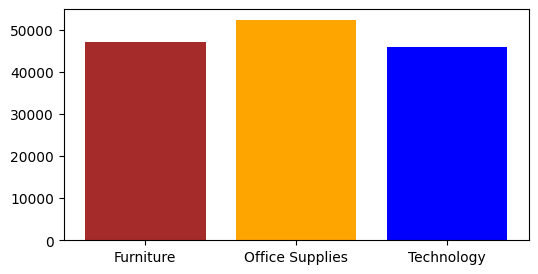

In [115]:
plt.figure(figsize=(6,3))
plt.bar(pbc['Product Category'],pbc['Profit'] , color=['brown','orange','blue'])
plt.show()

In [118]:
# !pip install voila

In [119]:
import voila

In [2]:
# !pip install panel

In [3]:
import panel as pn

In [5]:
pn.extension("Project.ipynb")
